In [472]:
# Import all the necessary modules and packages for our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in the CSV
csv = pd.read_csv(r'C:\Users\jtrie\OneDrive\WGU\D209\medical_clean.csv')

# Use .head() function to make sure dataframe has been created correctly
csv.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [473]:
# Create a DF with only the columns needed to answer the research question
df = csv.iloc[:, 14:42]

In [474]:
# Get a sense of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arthr

In [475]:
# Check for missing values
df.isnull().sum()

Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [476]:
# Check for duplicated values within the dataset
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [477]:
# Mapping categorical data to nominal
df['Marital'] = df['Marital'].map({'Divorced':0, 'Married':1, 'Never Married':2, 'Separated':3, 'Widowed':4}) 
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1, 'Nonbinary':3}) 
df['ReAdmis'] = df['ReAdmis'].map({'No':0, 'Yes':1}) 
df['Soft_drink'] = df['Soft_drink'].map({'No':0, 'Yes':1}) 
df['Initial_admin'] = df['Initial_admin'].map({'Elective Admission':0, 'Emergency Admission':1, 'Observation Admission':2}) 
df['HighBlood'] = df['HighBlood'].map({'No':0, 'Yes':1}) 
df['Stroke'] = df['Stroke'].map({'No':0, 'Yes':1}) 
df['Complication_risk'] = df['Complication_risk'].map({'Low':0, 'Medium':1, 'High':2}) 
df['Overweight'] = df['Overweight'].map({'No':0, 'Yes':1}) 
df['Arthritis'] = df['Arthritis'].map({'No':0, 'Yes':1}) 
df['Diabetes'] = df['Diabetes'].map({'No':0, 'Yes':1}) 
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'No':0, 'Yes':1}) 
df['BackPain'] = df['BackPain'].map({'No':0, 'Yes':1}) 
df['Anxiety'] = df['Anxiety'].map({'No':0, 'Yes':1}) 
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map({'No':0, 'Yes':1})
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map({'No':0, 'Yes':1})
df['Asthma'] = df['Asthma'].map({'No':0, 'Yes':1})
df['Services'] = df['Services'].map({'Blood Work':0, 'CT Scan':1, 'Intravenous':2, 'MRI':3})

In [478]:
X = df.drop(['ReAdmis'], axis=1)  # Features
y = df['ReAdmis']  # Target variable

counts = df['ReAdmis'].value_counts()
print(counts)
      
# Select the top 2 features 
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

ReAdmis
0    6331
1    3669
Name: count, dtype: int64
Index(['Initial_days', 'TotalCharge'], dtype='object')


In [479]:
df = df[['Initial_days', 'TotalCharge', 'ReAdmis']]

<Axes: ylabel='Initial_days'>

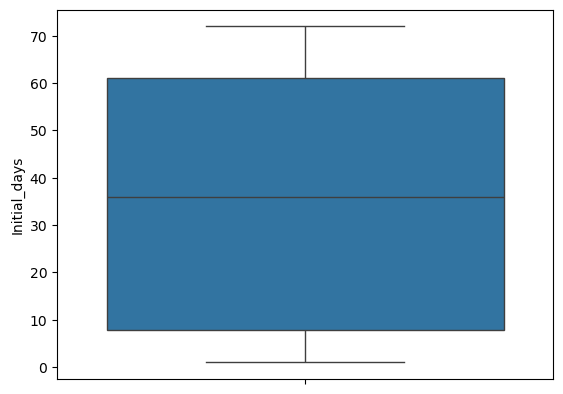

In [480]:
# Check for outliers
sns.boxplot(df['Initial_days'])

<Axes: ylabel='TotalCharge'>

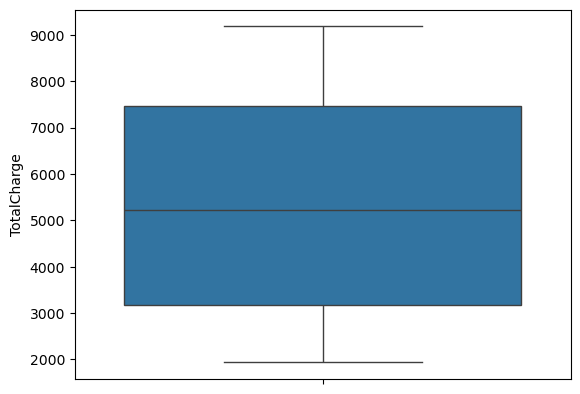

In [481]:
sns.boxplot(df['TotalCharge'])

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Initial_days  10000 non-null  float64
 1   TotalCharge   10000 non-null  float64
 2   ReAdmis       10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [483]:
df.to_csv(r"C:\Users\jtrie\OneDrive\WGU\D209\Prepared_Data_JTR.csv", index=False, header=True)

In [484]:
# Standardize the continuous data
scaler = StandardScaler()
df[['TotalCharge', 'Initial_days']] = scaler.fit_transform(df[['TotalCharge', 'Initial_days']])

In [485]:
X = df.drop(['ReAdmis'], axis= 1) # Independent variables
y = df['ReAdmis'] # Dependent variable

# Split our data into training and test set for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 15, stratify = y)

frames_train = [X_train, y_train]
df_train = pd.concat(frames_train, axis = 1)
frames_test = [X_test, y_test]
df_test = pd.concat(frames_test, axis = 1)

df_train.to_csv(r'C:\Users\jtrie\OneDrive\WGU\D209\df_train.csv', index=False, header=True)
df_test.to_csv(r'C:\Users\jtrie\OneDrive\WGU\D209\df_test.csv', index=False, header=True)

In [486]:
# Use GridSearchCV to find the best parameters for our model (Okamura, 2020)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(95, 110)}
                             
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy', return_train_score = False, verbose = 1, error_score='raise')

grid_search = grid.fit(X_train, y_train)

print('The best K value is: ')
print(grid_search.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
The best K value is: 
{'n_neighbors': 108}


In [487]:
# Use K-NN to fit our our data and print our confusion matrix and accuracy scores (Elleh, 2024)
knn = KNeighborsClassifier(n_neighbors = 108, metric = 'euclidean', weights = 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('The confusion matrix of the model is: ')
print(confusion_matrix(y_test, y_pred))

print('The accuracy of the model is: ', knn.score(X_test, y_test))
print('The accuracy of the training model is: ', knn.score(X_train, y_train))

The confusion matrix of the model is: 
[[1867   32]
 [  28 1073]]
The accuracy of the model is:  0.98
The accuracy of the training model is:  1.0


In [488]:
# Print the AUC score for our model (Elleh, 2024)
y_predProb = knn.predict_proba(X_test)[:,1]
print('The AUC for the model is: ', roc_auc_score(y_test, y_predProb))

The AUC for the model is:  0.9981181835269675


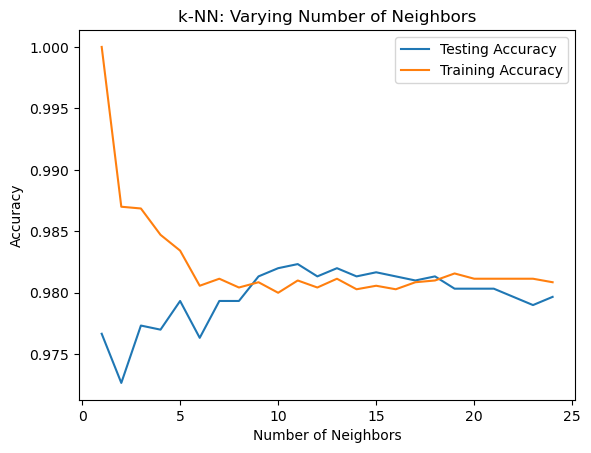

In [489]:
# Model complexity curve  (Datacamp, n.d)
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over differenct values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    #Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

    #print("K: ", i, " Train Score:", train_accuracy[i], "Test Score:", test_accuracy[i]

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()